In [15]:
import camb
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
from mpmath import quad, npdf
import mpmath as mp
import matplotlib.cm as cm
mp.dps = 30

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [33]:
def gaussian_mean(M, r, a=77.4, b=0.87, c=-0.23, fsusy=1):
    """Return mean of conditional luminosity distribution.
    
    Inputs:
        - M: mass of subhalo [solar masses]
        - r: distance from galactic center [kpc]
        - a: coefficient for first term [default=77.4]
        - b: coefficient for second term [default=0.97]
        - c: coefficient for third term [default=-0.23]
        - fsusy: value of fsusy [default=1e-28 [cm**3 s**-1 GeV**-2]]
        
    Returns:
        - mean of the gaussian distribution
    """
    return a + b * mp.log(M / 1e5) + c * mp.log(r / 50) + mp.log(fsusy)


def gaussian_sd(M, r, a=0.74, b=-0.003, c=-0.011):
    """Return the sd of the conditional luminosity function.
    
    Inputs:
        - M: mass of subhalo [solar masses]
        - r: distance from galactic center [kpc]
        - a: coefficient for first term [default=0.74]
        - b: coefficient for second term [default=-0.003]
        - c: coefficient for third term [default=-0.011]
    
    Returns:
        - sd of gaussian
    """
    return a + b * mp.log(M / 1e5) + c * mp.log(r / 50)


def conditional_luminosity_function(L, M, r):
    """Gives the value of the conditional luminosity function.
    
    Inputs:
        - L: natural log of lumionsity of the subhalo
        - M: mass of the subhalo [solar masses]
        - r: galactocentric radius of the subhalo [kpc]
        
    Returns:
        - value of the clf
    """
    mean = gaussian_mean(M, r)
    sigma = gaussian_sd(M, r)
    
#     return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-((L-mean)/2*sigma)**2)
#     return stats.norm.pdf(L, mean, sigma)
    return npdf(L, mean, sigma)


def mass_distribution(M, r, A=1.2e4, beta=1.9, rs=21):
    """Return the mass distribution value.
    
    Inputs:
        - M: mass of the subhalo [solar masses]
        - r: galactocentric radius of the subhalo [kpc]
        - A: amplitude [default=1.2e4 [solar mass**-1 kpc**-3]]
        - beta: strength of dependence on mass [default value=1.9]
        - rs: scale radius of Milky Way [default value=21 [kpc]]
        
    Returns:
        - value of mass distribution
    """
    r_tilde = r / rs
    
    return A * M**(-beta) / (r_tilde * (1 + r_tilde)**2)


def p1(F, psi, R_G=220, M_min=0.01, M_max=1e10, d_solar=8.5):
    """Return the value of the probability distribution of one subhalo.
    
    Inputs:
        - F: flux of subhalo [photons/beam/year]
        - psi: angle from galactic center [degrees]
        - R_G: extent of dm halo [default value=220 [kpc]]
        - M_min: lower limit on mass integral [default=0.01 [solar masses]]
        - M_max: upper limit on mass integral [default=1e10 [solar masses]]
        - d_solar: galactocentric distance of sun [default=8.5 [kpc]]
        
    Returns:
        - value of probability of one subhalo for a given flux and angle
    """
    # Get upper bound for l integral
    psi_rad = psi * np.pi / 180
    l_max = d_solar * (mp.cos(psi_rad) + mp.sqrt(-np.sin(psi_rad)**2 + (R_G/d_solar)**2))
    
    # Convert years to seconds
    yrs_to_seconds = 3.154e7
    
    # Convert cm to kpc
    kpc_to_cm = 3.086e21

    integrand = lambda l, M: l**4 * mass_distribution(M, (r := mp.sqrt(l**2 + d_solar**2 - 2*l*d_solar*mp.cos(psi_rad)))) * conditional_luminosity_function(mp.log(L:= (4 * np.pi * l**2 * F / yrs_to_seconds / 2000 * kpc_to_cm**2)), M, r)/L
    
#     def intergra(M, l):
#         r = np.sqrt(l**2 + d_solar**2 - 2*l*d_solar*np.cos(psi_rad))
#         return l**4 * mass_distribution(M, r) * conditional_luminosity_function(np.log(4 * np.pi * l**2 * F / yrs_to_seconds * kpc_to_cm**2), M, r)
    
#     x = np.linspace(0.000000001, l_max, num=10000)
#     y = np.logspace(np.log10(M_min), np.log10(M_max), num=10000)
#     int_exp2d = np.trapz(np.trapz(intergra(y[:,np.newaxis],x[:,np.newaxis,np.newaxis]), y, axis=0), x, axis=0)
    
#     return int_exp2d

    return quad(integrand, [0, l_max], [M_min, M_max], maxdegree=10)

In [34]:
flux = 1e-6
flux * p1(flux, 40)

mpf('4.4167261462555701e-26')

In [11]:
def gaussian_mean(M, r, a=77.4, b=0.87, c=-0.23, fsusy=1):
    """Return mean of conditional luminosity distribution.
    
    Inputs:
        - M: mass of subhalo [solar masses]
        - r: distance from galactic center [kpc]
        - a: coefficient for first term [default=77.4]
        - b: coefficient for second term [default=0.97]
        - c: coefficient for third term [default=-0.23]
        - fsusy: value of fsusy [default=1e-28 [cm**3 s**-1 GeV**-2]]
        
    Returns:
        - mean of the gaussian distribution
    """
    return a + b * np.log(M / 1e5) + c * np.log(r / 50) #+ np.log(fsusy)


def gaussian_sd(M, r, a=0.74, b=-0.003, c=-0.011):
    """Return the sd of the conditional luminosity function.
    
    Inputs:
        - M: mass of subhalo [solar masses]
        - r: distance from galactic center [kpc]
        - a: coefficient for first term [default=0.74]
        - b: coefficient for second term [default=-0.003]
        - c: coefficient for third term [default=-0.011]
    
    Returns:
        - sd of gaussian
    """
    return a + b * np.log(M / 1e5) + c * np.log(r / 50)


def conditional_luminosity_function(lnL, M, r, mean_params={}, sd_params={}):
    """Gives the value of the conditional luminosity function.
    
    Inputs:
        - lnL: natural log of lumionsity of the subhalo
        - M: mass of the subhalo [solar masses]
        - r: galactocentric radius of the subhalo [kpc]
        
    Returns:
        - value of the clf
    """
    if len(mean_params) > 0:
        mean = gaussian_mean(M, r, **mean_params)
    else:
        mean = gaussian_mean(M, r)

    if len(sd_params) > 0:
        sigma = gaussian_sd(M, r, **sd_params)
    else:
        sigma = gaussian_sd(M, r)
    
#     return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-((lnL-mean)/sigma)**2/2)
    return stats.norm.pdf(lnL, mean, sigma)


def mass_distribution(M, r, A=1.2e4, beta=1.9, rs=21):
    """Return the mass distribution value.
    
    Inputs:
        - M: mass of the subhalo [solar masses]
        - r: galactocentric radius of the subhalo [kpc]
        - A: amplitude [default=1.2e4 [solar mass**-1 kpc**-3]]
        - beta: strength of dependence on mass [default value=1.9]
        - rs: scale radius of Milky Way [default value=21 [kpc]]
        
    Returns:
        - value of mass distribution
    """
    r_tilde = r / rs
    
    return A * M**(-beta) / (r_tilde * (1 + r_tilde)**2)


def p1(F, psi, R_G=220, M_min=0.01, M_max=1e10, d_solar=8.5, mean_params={}, sd_params={}):
    """Return the value of the probability distribution of one subhalo.
    
    Inputs:
        - F: flux of subhalo [photons/beam/year]
        - psi: angle from galactic center [degrees]
        - R_G: extent of dm halo [default value=220 [kpc]]
        - M_min: lower limit on mass integral [default=0.01 [solar masses]]
        - M_max: upper limit on mass integral [default=1e10 [solar masses]]
        - d_solar: galactocentric distance of sun [default=8.5 [kpc]]
        
    Returns:
        - value of probability of one subhalo for a given flux and angle
    """
    # Get upper bound for l integral
    psi_rad = np.deg2rad(psi)
    l_max = d_solar * (np.cos(psi_rad) + np.sqrt(-(np.sin(psi_rad)**2) + (R_G/d_solar)**2))
    
    # Convert years to seconds
    seconds_in_a_year = 3.154e7
    
    # Convert cm to kpc
    cm_in_a_kpc = 3.086e21


#     integrand = lambda l, M: l**4 * mass_distribution(M, (r := mp.sqrt(l**2 + d_solar**2 - 2*l*d_solar*mp.cos(psi_rad)))) * conditional_luminosity_function(mp.log(4 * np.pi * l**2 * F / yrs_to_seconds * kpc_to_cm**2), M, r)
    
    def intergra(M, l):
        # Luminosity
        Lsh = 4 * np.pi * l**2 * F / seconds_in_a_year / 2000 * cm_in_a_kpc**2
        
        # radius form GC
        r = np.sqrt(l**2 + d_solar**2 - 2*l*d_solar*np.cos(psi_rad))
        
        return l**4 * mass_distribution(M, r) / Lsh * conditional_luminosity_function(np.log(Lsh), M, r, mean_params=mean_params, sd_params=sd_params)
    
    num = 100
    lvals = np.linspace(1e-10, l_max, num=num)
    mvals = np.logspace(np.log10(M_min), np.log10(M_max), num=num)
#     int_exp2d = np.trapz(np.trapz(intergra(y[:,np.newaxis,np.newaxis],x[:,np.newaxis]), y, axis=0), x, axis=0)
    int_exp2d = integrate.simps(integrate.simps(intergra(mvals[:,np.newaxis,np.newaxis],lvals[:,np.newaxis]), mvals, axis=0), lvals, axis=0)
    
    return int_exp2d

#     return quad(integrand, [0, l_max], [M_min, M_max])

In [12]:
flux = 1e-6
flux * p1(flux, 40, M_max=1e10)

array([5.03262181e-26])

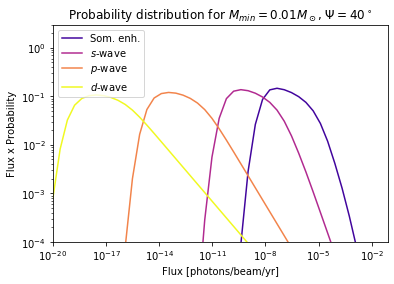

In [26]:
plt.close()

fig, ax = plt.subplots()
n_list = [-1, 0, 2, 4]
n_labels = {-1:"Som. enh.", 0: r"$s$-wave", 2:r"$p$-wave", 4:r"$d$-wave"}
colors = iter(cm.plasma(np.linspace(0.1, 1, num=len(n_list))))

for n in n_list:
    mean_params = {'a':77.4, 'b':0.87+0.31*n, 'c':-0.23-0.04*n}
    fluxes = np.logspace(-20, 0, num=50)
    probs = p1(fluxes, 40, mean_params=mean_params)
    # probs = [p1(flux, 40) for flux in fluxes]
    normalization = np.trapz(probs, fluxes)

    ax.plot(fluxes, fluxes*probs/normalization, label=n_labels[n], color=next(colors))

ax.set_xscale('log')
ax.set_xlabel('Flux [photons/beam/yr]')
ax.set_ylabel('Flux x Probability')
ax.set_yscale('log')
ax.set_ylim(bottom=1e-4, top=3)
ax.set_xlim(left=1e-20, right=8e-2)

ax.set_title(r"Probability distribution for $M_{min}=0.01 M_\odot$, $\Psi=40^\circ$")

# fluxes = np.logspace(-15, -3, num=25)
# # probs = p1(fluxes, 40, M_min=1e-6)
# probs = [p1(flux, 40, M_min=1e-6) for flux in fluxes]
# normalization = np.trapz(probs, fluxes)
# ax.plot(fluxes, fluxes*probs/normalization, label=r"$M_{min}=10^{-6} M_\odot$", color="xkcd:robin's egg blue")

ax.legend(loc='upper left')

In [27]:
fig.savefig('eq4_w_vel_dep.png')